### Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [5]:
data = pd.read_csv("BostonHousing.csv")
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [9]:
data.dropna(inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     501 non-null    float64
 1   zn       501 non-null    float64
 2   indus    501 non-null    float64
 3   chas     501 non-null    int64  
 4   nox      501 non-null    float64
 5   rm       501 non-null    float64
 6   age      501 non-null    float64
 7   dis      501 non-null    float64
 8   rad      501 non-null    int64  
 9   tax      501 non-null    int64  
 10  ptratio  501 non-null    float64
 11  b        501 non-null    float64
 12  lstat    501 non-null    float64
 13  medv     501 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 58.7 KB


### Determining Normality

<Axes: >

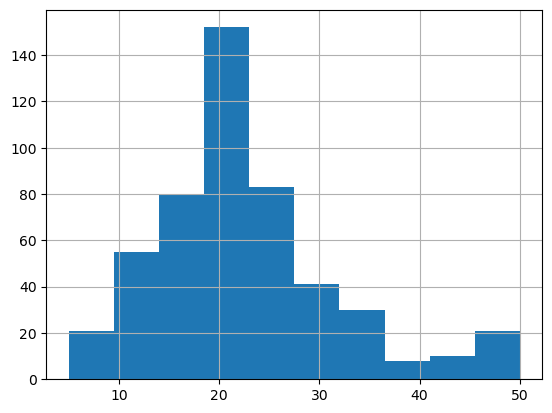

In [12]:
data.medv.hist()

In [13]:
from scipy.stats.mstats import normaltest

In [14]:
normaltest(data.medv.values)

NormaltestResult(statistic=88.62949664146545, pvalue=5.680013100453049e-20)

### Apply Log Transformation

In [16]:
log_medv = np.log(data.medv)

<Axes: >

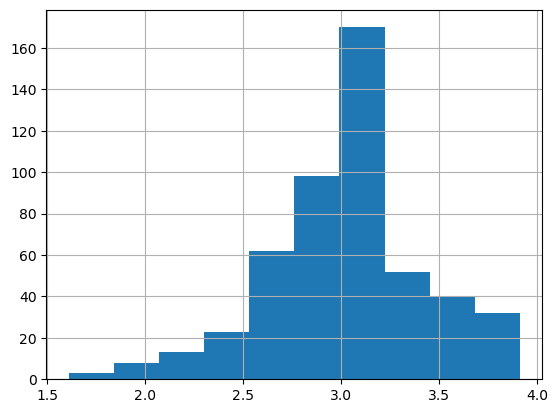

In [17]:
log_medv.hist()

In [18]:
normaltest(log_medv)

NormaltestResult(statistic=16.937471206460426, pvalue=0.0002099301706559095)

### Square Root Transformation

In [20]:
sqrt_medv = np.sqrt(data.medv)

<Axes: >

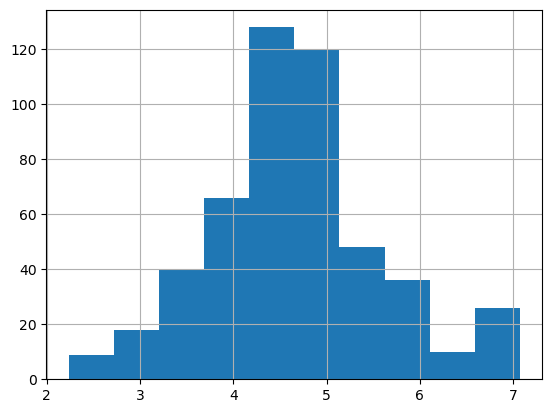

In [21]:
sqrt_medv.hist()

In [22]:
normaltest(sqrt_medv)

NormaltestResult(statistic=19.530725337043492, pvalue=5.740594615108021e-05)

### Box Cox Transformation

In [24]:
from scipy.stats import boxcox

In [25]:
bc_result = boxcox(data.medv)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [26]:
lam

0.21965820266518996

(array([  4.,  15.,  17.,  49.,  66., 149.,  98.,  50.,  23.,  30.]),
 array([1.93063745, 2.35741208, 2.7841867 , 3.21096132, 3.63773594,
        4.06451056, 4.49128518, 4.9180598 , 5.34483442, 5.77160905,
        6.19838367]),
 <BarContainer object of 10 artists>)

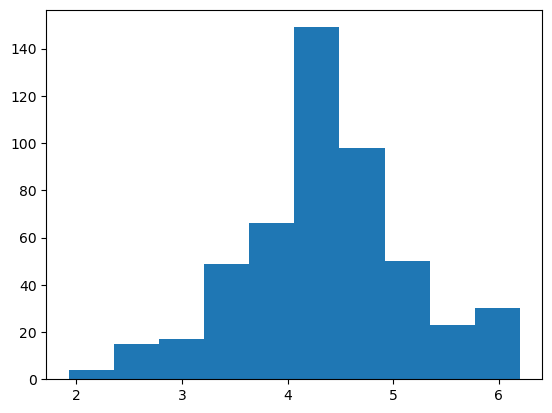

In [27]:
plt.hist(boxcox_medv)

In [28]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.185545939297432, pvalue=0.12334463024214952)

### Testing regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [31]:
lr = LinearRegression()

In [32]:
X = data.drop("medv", axis = 1)
y = data.medv

In [33]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [34]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 501, dtype: float64

In [35]:
pf = PolynomialFeatures(degree = 2, include_bias = False)
X_pf = pf.fit_transform(X)

In [36]:
X_pf.shape

(501, 104)

### Train Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size = 0.3, random_state = 42)

### Fit StandardScaler on X_train

In [40]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

### Apply the appropriate transformation

In [42]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [43]:
lam

0.21965820266518996

### Applying Linear Regression

In [45]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

### Inverse Transform

In [47]:
from scipy.special import inv_boxcox

In [48]:
y_pred_tran = inv_boxcox(y_pred_bc, lam2)
r2_score(y_pred_tran, y_test)

0.8307300928806501

### Applying Lasso Regression

In [50]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.004)

In [51]:
lasso.fit(X_train_s, y_train_bc)

Lasso(alpha=0.004)

In [52]:
y_pred_lasso = lasso.predict(X_test_s)

In [53]:
y_pred_lasso_tran = inv_boxcox(y_pred_lasso, lam2)
r2_score(y_pred_lasso_tran, y_test)

0.8526005713504874

### Applying Ridge Regression

In [55]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.08)

In [56]:
ridge.fit(X_train_s, y_train_bc)

Ridge(alpha=0.08)

In [57]:
y_pred_ridge = ridge.predict(X_test_s)

In [58]:
y_pred_ridge_tran = inv_boxcox(y_pred_ridge, lam2)
r2_score(y_pred_ridge_tran, y_test)

0.8809185852158691